In [1]:
%load_ext autoreload
%autoreload 2

import plotter
import analysis
import lmpsetup

import numpy as np
import matplotlib.pyplot as plt
import analysis

## Summary

This week is mainly a "testing" week, where we want to review different techniques used by other that are to be used in the future :

**[1. HPS-T Model](#1)** : We want to reproduce the HPS-T model. Up to now all tests have failed but the model seems to be used correctly. To make a final test, we'll run a long one on **CspTm and Integrase**, saving more frequently. Also, we will make a first test for **CPEB variants.**


**[2. Debye as a function of T](#2)** : We also want to compare the Debye Wavelength effect when having the correct T dependance or not for either the HPS model or the HPS-T one... 


**[3. Slab method](#3)** : Implement a simple slab method on LAMMPS, and performance. We'll probably optimize Chan's model


**[4. HPS Scale](#4)** : Ramon asked for a comparison between 7D and WT using an hps of around 0.9, and see whether we see some difference in droplet formation at 300K (which is not present in the normal case at 300K)


**[5. Scaled TDP](#5)** : Rerun TDP reweighting using a scaled HPS ($\lambda = 0.7\lambda$)

### 1. HPS-T Model <a id='1'></a>

Runs for **CspTm and integrase**

In [56]:
integrase = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/Integrase', 
                              protein='Integrase', 
                              temper=False, 
                              chains=1, 
                              model='HPS-T',
                              debye=0.1,
                              host='@perdiu34',
                              save=5000)
integrase.temperatures = [275, 300, 325, 350, 375, 400, 450]
integrase.processors = 2
integrase.t = 2000000000
integrase.write_hps_files(silent=True)

In [50]:
csptm = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CspTm', 
                              protein='CspTm', 
                              temper=False, 
                              chains=1, 
                              model='HPS-T',
                              host='@perdiu35',
                              debye=0.1,
                              save=5000)
csptm.temperatures = [275, 300, 325, 350, 375, 400, 450]
csptm.processors = 2
csptm.t = 2000000000
csptm.write_hps_files(silent=True)

The results for these tests are :

In [2]:
p = plotter.Plotter(data_dir='/home/adria/perdiux/prod/lammps/dignon')
p.index

,Protein,I,Eps,Scale,Name,FullPath
0,dignon,100,80.0,1.29,12D,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
1,dignon,100,80.0,1.29,7D,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
2,dignon,100,80.0,1.29,D4,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
3,dignon,100,80.0,1.29,WT,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
4,dignon,100,80.0,1.00,12D,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
5,dignon,100,80.0,1.00,7D,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
6,dignon,100,80.0,1.00,D4,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
7,dignon,100,80.0,1.00,WT,/home/adria/perdiux/prod/lammps/dignon/CARLA-R...
8,dignon,100,80.0,1.00,CONTACT-TEST,/home/adria/perdiux/prod/lammps/dignon/CONTACT...
9,dignon,100,80.0,1.00,1.0ls-100I-80e,/home/adria/perdiux/prod/lammps/dignon/CPEB4/x...


> Run Completed at 67.18% for CspTm. Ran 1343590000 steps for a total of 268719 frames 
(7, 50000)


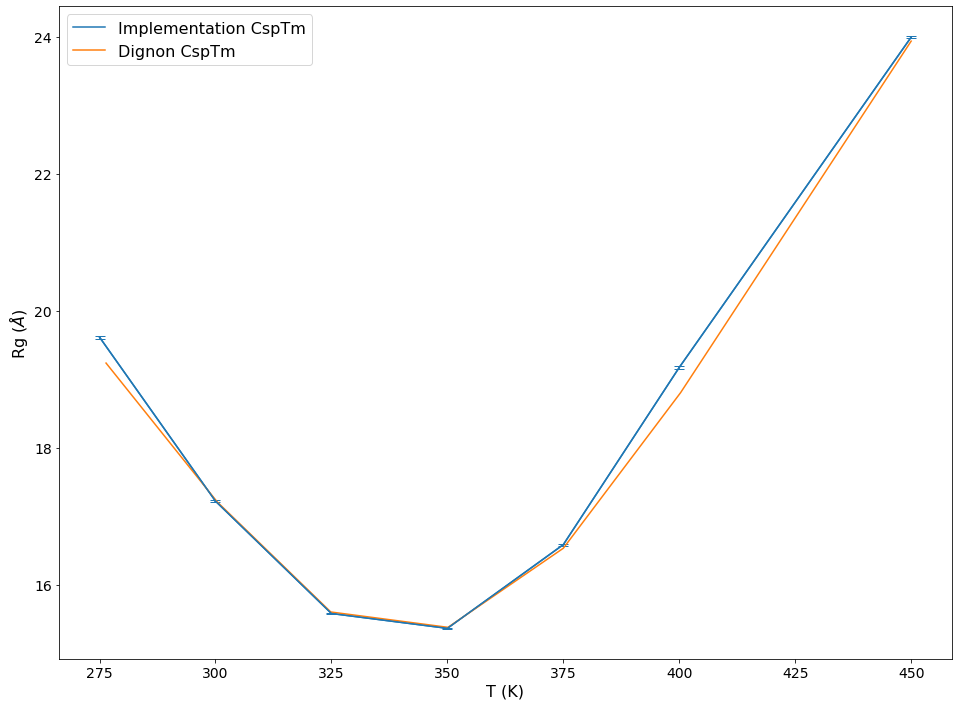

In [8]:
# CspTm

rg_T = []
p.clean('rg_csp')
rg = p.plot(observable='rg', index=26, plot_id='rg_csp', label='Implementation CspTm')
rg_exp = np.genfromtxt('/home/adria/documents/csp.txt')
p.plots['rg_csp'][1].plot(rg_exp[:,0], rg_exp[:,1]*10, label='Dignon CspTm')
p.plots['rg_csp'][1].legend(fontsize=16)

> Run Completed at 100.00% for Integrase. Ran 2000000000 steps for a total of 400001 frames 
(7, 50000)


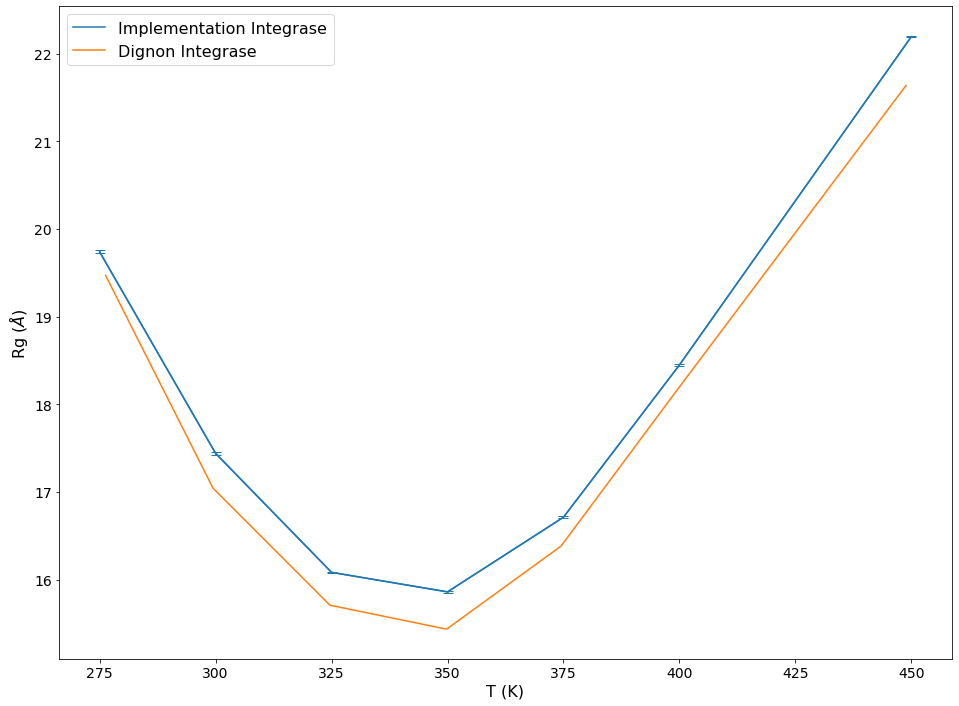

In [9]:
# Integrase

rg_T = []
p.clean('rg_integrase')
rg = p.plot(observable='rg', index=27, plot_id='rg_integrase', label='Implementation Integrase')
rg_exp = np.genfromtxt('/home/adria/documents/integrase.txt')
p.plots['rg_integrase'][1].plot(rg_exp[:,0], rg_exp[:,1]*10, label='Dignon Integrase')
p.plots['rg_integrase'][1].legend(fontsize=16)

Now for **CPEB variants**:

In [75]:
wt = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4', 
                              protein='CPEB4', 
                              temper=False, 
                              chains=1, 
                              host='@perdiu42',
                              model='HPS-T',
                              debye=0.1,
                              save=5000)
wt.temperatures = [275, 300, 325, 350, 375, 400, 450]
wt.processors = 2
wt.t = 1000000000
wt.write_hps_files(silent=True)

In [76]:
d12 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/12D_CPEB4_D4', 
                              protein='12D_CPEB4_D4', 
                              temper=False, 
                              chains=1, 
                              model='HPS-T',
                              host='@perdiu38',
                              debye=0.1,
                              save=5000)
d12.temperatures = [275, 300, 325, 350, 375, 400, 450]
d12.processors = 2
d12.t = 1000000000
d12.write_hps_files(silent=True)

In [77]:
d7 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/7D_CPEB4', 
                              protein='7D_CPEB4', 
                              temper=False, 
                              chains=1, 
                              model='HPS-T',
                              host='@perdiu39',
                              debye=0.1,
                              save=5000)
d7.temperatures = [275, 300, 325, 350, 375, 400, 450]
d7.processors = 2
d7.t = 1000000000
d7.write_hps_files(silent=True)

In [78]:
d4 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4_D4', 
                              protein='CPEB4_D4', 
                              temper=False, 
                              chains=1, 
                              model='HPS-T',
                              host='@perdiu43',
                              debye=0.1,
                              save=5000)
d4.temperatures = [275, 300, 325, 350, 375, 400, 450]
d4.processors = 2
d4.t = 1000000000
d4.write_hps_files(silent=True)

And now the radius of gyration

> Run Completed at 21.91% for 12D_CPEB4_D4. Ran 219050000 steps for a total of 43811 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
(7, 10000)
> Run Completed at 14.38% for 7D_CPEB4. Ran 143805000 steps for a total of 28762 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
(7, 10000)
> Run Completed at 31.77% for CPEB4. Ran 317695000 steps for a total of 63540 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
(7, 10000)
> Run Completed at 38.98% for CPEB4_D4. Ran 389850000 steps for a total of 77971 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
(7, 10000)


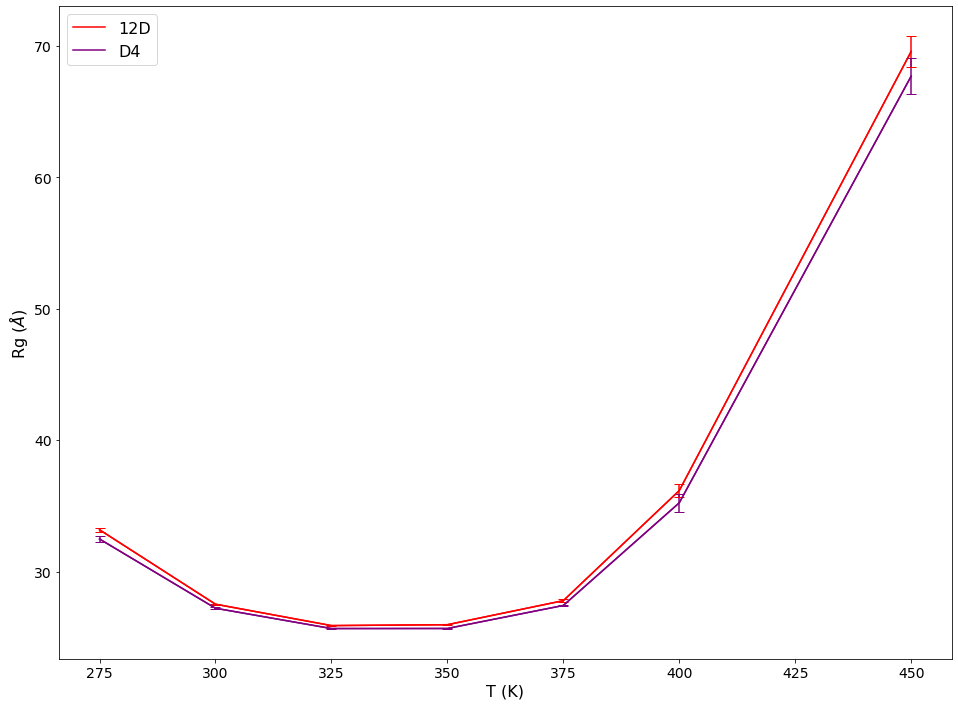

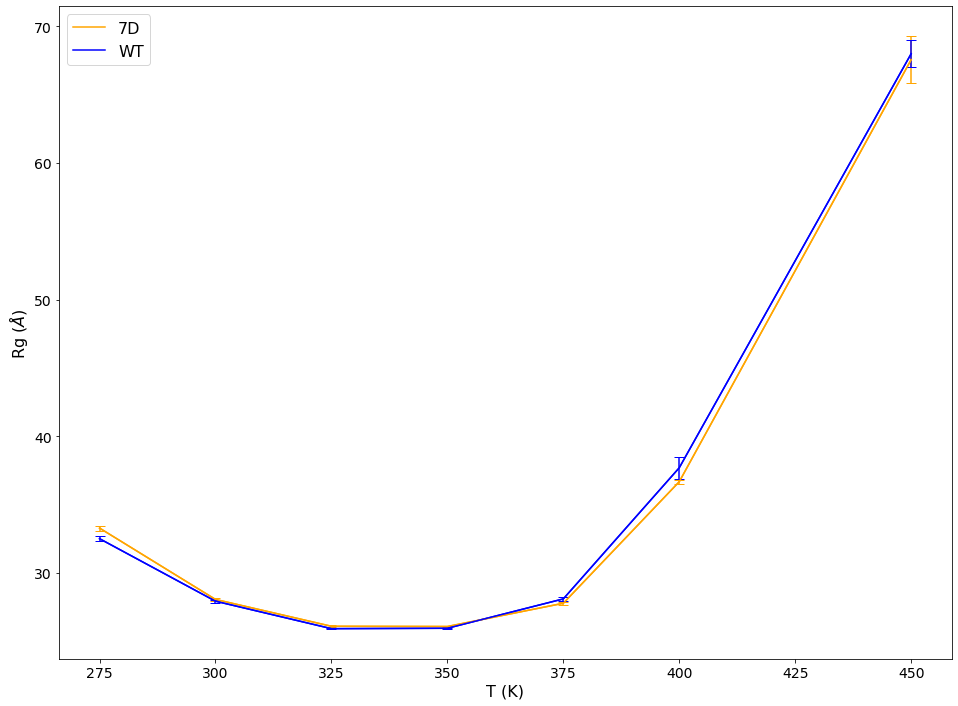

In [3]:
rg = p.plot(observable='rg', index=22, plot_id='d4', label='12D', color='red')
rg = p.plot(observable='rg', index=24, plot_id='wt', label='7D', color='orange')
rg = p.plot(observable='rg', index=26, plot_id='wt', label='WT', color='blue')
rg = p.plot(observable='rg', index=27, plot_id='d4', label='D4', color='purple')

> Run Completed at 21.91% for 12D_CPEB4_D4. Ran 219050000 steps for a total of 43811 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
> Run Completed at 38.98% for CPEB4_D4. Ran 389850000 steps for a total of 77971 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations


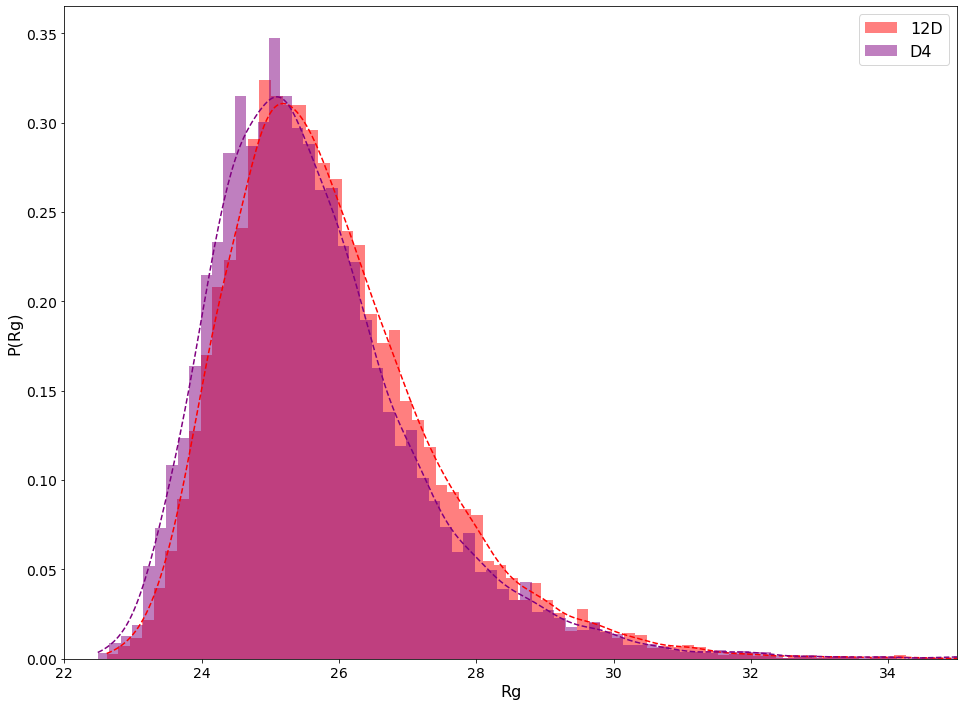

In [4]:
rg = p.plot(observable='rg_distr', index=22, plot_id='rdd4', label='12D', color='red', T=2)
rg = p.plot(observable='rg_distr', index=27, plot_id='rdd4', label='D4', color='purple', T=2)

> Run Completed at 14.38% for 7D_CPEB4. Ran 143805000 steps for a total of 28762 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations
> Run Completed at 31.77% for CPEB4. Ran 317695000 steps for a total of 63540 frames 
> Taking frames every 2 for a total of 10000 to avoid strong correlations


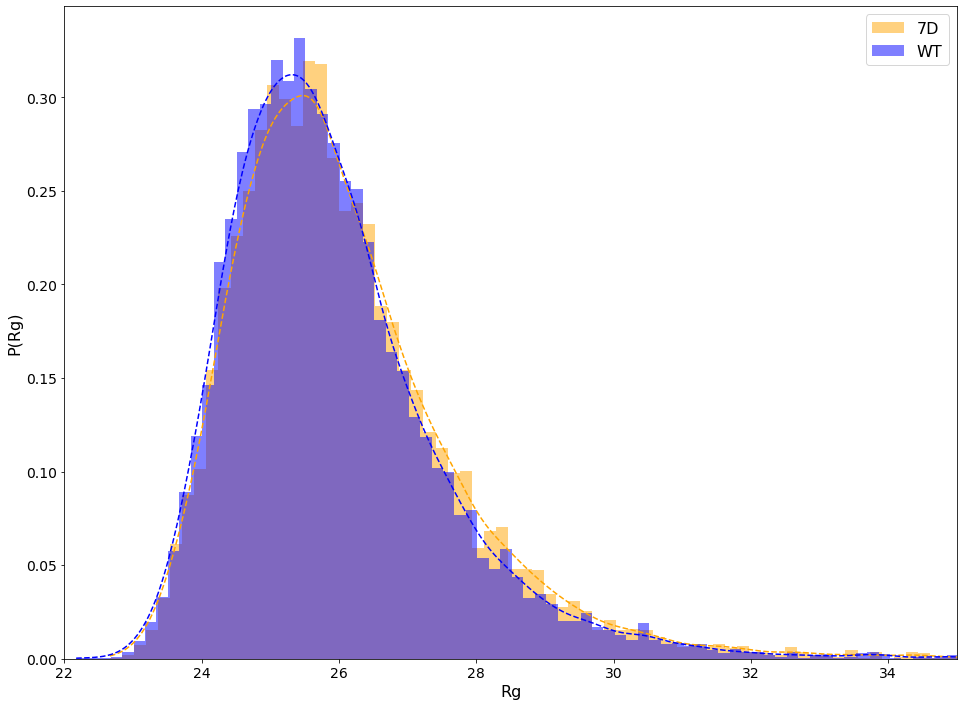

In [5]:
rg = p.plot(observable='rg_distr', index=24, plot_id='rdwt', label='7D', color='orange', T=2)
rg = p.plot(observable='rg_distr', index=26, plot_id='rdwt', label='WT', color='blue', T=2)

### 2. Debye as a function of T <a id='2'></a>

Discarded

### 3. Slab Method <a id='3'></a>

#### Chan's slab

*We begin each simulation by randomly placing n = 500 IDP chains in a periodic cubic
simulation box of length 70a. Subsequently, the chain configurations are energy-minimized
and then heated to a high T
∗ = 4.0 for 5, 000τ . This is followed by a compression of the
periodic simulation box (by isotropic rescaling of all chain coordinates) at a constant rate
under the same high T
∗ = 4.0 for 10, 000τ to arrive at a much smaller periodic cubic box
of length 33a, resulting in a final IDP density ρ ≈ 0.7m/a3
. The simulation box is then
expanded along the direction (labeled as z) of one of the three axes of the box by a factor
of eight with the temperature kept at a low T
∗ = 1.0, resulting in a simulation box with
dimensions 33a × 33a × 264a containing a concentration of chain population (a “slab”)
somewhere along the z-axis whereas chain population is zero or extremely sparse for other
parts of the elongated simulation box. Any conformation that is originally wrapped in the zdirection in the compressed 33a×33a×33a box because of the periodic boundary conditions
is unwrapped in this expansion process by placing the chain conformation entirely on the
side of the “slab” with larger z values (see Fig. 1 for a visualization129 of this procedure).*

In [80]:
s = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SLAB-TEST/CHAN',
                      use_random=True,
                      protein='CPEB4',
                      temperatures=[300],
                      chains=50,
                      slab=True,
                      save=5000,
                      t=100000000,
                      temper=False)
s.processors = 4
s.write_hps_files(silent=True)

In [5]:
chan_s = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SLAB-TEST/CHAN', equil_frames=0)
chan_s.save_movies(frames='all')

> Run Completed at 100.00% for CPEB4. Ran 10000 steps for a total of 3 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


My main mistake was taking CHan's description too literal, and my slab expansion was followed by a remap of the x coordinates. This is obviously what we don't want to achieve, therefore we must disable remapping !!

<img src='img/slab_test.gif' width=300> 

It seems then that we might be ready to simulate droplets for our constructs !

In [18]:
wt = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4x50', 
                      protein='CPEB4', 
                      temper=False, 
                      chains=50, 
                      host='@perdiu42',
                      model='HPS-T',
                      debye=0.1,
                      use_random=True,
                      slab=True,
                      save=5000)
wt.temperatures = [275, 300, 325, 350, 375, 400, 450]
wt.processors = 2
wt.t = 1000000000
wt.write_hps_files(silent=True)

In [19]:
d12 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/12D_CPEB4_D4x50', 
                       protein='12D_CPEB4_D4', 
                       temper=False, 
                       chains=50, 
                       model='HPS-T',
                       host='@perdiu38',
                       debye=0.1,
                       use_random=True,
                       slab=True,
                       save=5000)
d12.temperatures = [275, 300, 325, 350, 375, 400, 450]
d12.processors = 2
d12.t = 1000000000
d12.write_hps_files(silent=True)

In [20]:
d7 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/7D_CPEB4x50', 
                      protein='7D_CPEB4', 
                      temper=False, 
                      chains=50, 
                      model='HPS-T',
                      host='@perdiu39',
                      slab=True,
                      debye=0.1,
                      use_random=True, 
                      save=5000)
d7.temperatures = [275, 300, 325, 350, 375, 400, 450]
d7.processors = 2
d7.t = 1000000000
d7.write_hps_files(silent=True)

In [21]:
d4 = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/HPS-T/CPEB4_D4x50', 
                      protein='CPEB4_D4', 
                      temper=False, 
                      chains=50, 
                      model='HPS-T',
                      host='@perdiu43',
                      debye=0.1,
                      slab=True,
                      use_random=True, 
                      save=5000)
d4.temperatures = [275, 300, 325, 350, 375, 400, 450]
d4.processors = 2
d4.t = 1000000000
d4.write_hps_files(silent=True)

### 4. HPS Scale <a id='4'></a>

In [99]:
d7 = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SCALE/7D', equil_frames=0).save_movies()
wt = analysis.Analysis(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SCALE/WT', equil_frames=0).save_movies()

> Run Completed at 14.55% for 7D_CPEB4. Ran 14550000 steps for a total of 292 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations
> Run Completed at 16.75% for CPEB4. Ran 16750000 steps for a total of 336 frames 
> Taking frames every 1 for a total of 1000 to avoid strong correlations


<img src='img/SCALED-7D.gif' width=300> 

<img src='img/SCALED-WT.gif' width=300>

Therefore it seems that it might be the good way forward, to reduce the HPS scaling

###  5. Scaled TDP <a id='5'></a>

In [90]:
tdp = lmpsetup.LMPSetup(oliba_wd='/home/adria/perdiux/prod/lammps/dignon/SCALED-TDP43',
                        temper=False,
                        temperatures=[300],
                        debye=0.1,
                        chains=1,
                        processors=4,
                        t=1000000000,
                        save=50000,
                        protein='TDP43',
                        hps_scale=0.7)
tdp.write_hps_files()

╔══════════════════════════════════════════════════════════════════════════════════════════════╗
║     Input files created at /home/adria/perdiux/prod/lammps/dignon/SCALED-TDP43 for TDP43     ║
║----------------------------------------------------------------------------------------------║
║   PARAMETERS                                                                                 ║
║       - Model = HPS                                                                          ║
║       - Chains = 1                                                                           ║
║       - Ionic Strength (mM) = 0.1                                                            ║
║       - Medium Permittivity = 80.0                                                           ║
║       - Temperatures (K) = [300]                                                             ║
║       - HPS Scale = 0.7                                                                      ║
╚═════════════════════════════